In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv(r'D:\Study Material\Projects\Iris Flower Classification/Iris Flower Dataset.csv')


In [50]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
df.isna().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


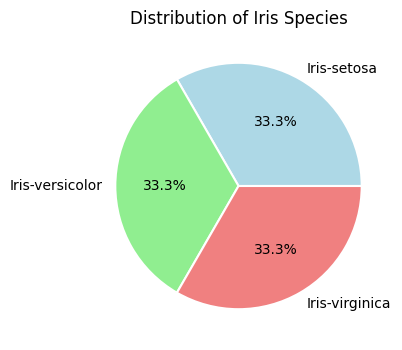

In [54]:
species_counts = df["species"].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'],
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
plt.title("Distribution of Iris Species")
plt.show()

In [77]:
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [79]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 1.0


In [80]:
species_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}  

print("Species Mapping:", species_mapping) 


Species Mapping: {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


In [81]:
prediction = rf_model.predict(new_data)[0]
print(f"Debug - Raw Prediction Output: {prediction}")  

species_name = species_mapping.get(prediction, "Unknown Species")

Debug - Raw Prediction Output: Iris-setosa


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


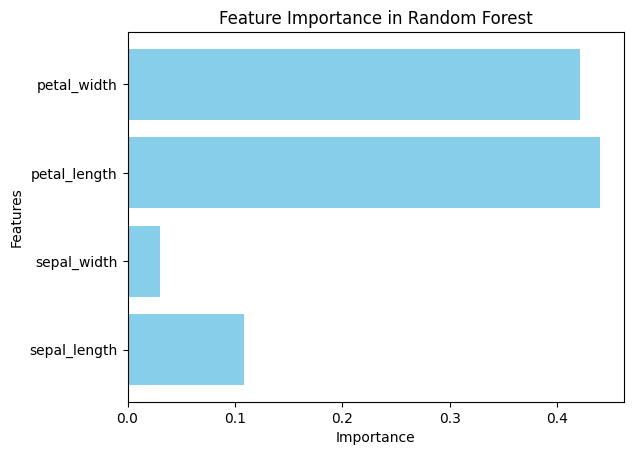

In [82]:
feature_importances = rf_model.feature_importances_
features = X.columns

plt.barh(features, feature_importances, color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

In [83]:
 In the Iris dataset, petal_length and petal_width are usually the most important features for classification.

SyntaxError: invalid syntax (2122851931.py, line 1)

In [ ]:
INPUT DATA

In [84]:
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  

prediction = rf_model.predict(new_data)

print("Predicted species:", prediction[0])

Predicted species: Iris-setosa


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
REAL TIME USER INPUT  

In [93]:
def predict_species():
    print("\n Enter the flower's measurements:")
    
    try:
        sepal_length = float(input(" Sepal Length (cm): "))
        sepal_width = float(input(" Sepal Width (cm): "))
        petal_length = float(input(" Petal Length (cm): "))
        petal_width = float(input(" Petal Width (cm): "))

        feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
        new_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]], columns=X.columns)

        prediction = rf_model.predict(new_data)[0]

        species_name = prediction  # Directly use the string prediction

        print(f"\n Predicted Iris Species: {species_name}\n")
    
    except ValueError:
        print("\n Invalid input! Please enter numeric values only.\n")

predict_species()



 Enter the flower's measurements:


 Sepal Length (cm):  6.5
 Sepal Width (cm):  3.0
 Petal Length (cm):  5.2
 Petal Width (cm):  2.0



 Predicted Iris Species: Iris-virginica

